## PCA

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
#call files from xdrive, merge them together as needed
import numpy as np

PCA Min Max Scaler

In [2]:
import split_test_and_train as splt
import feature_selection as fs
from sklearn.decomposition import PCA
import pandas as pd
from build_a_pipeline import make_simple_pipeline
# keep the first ten principal components of the data
X_test,y_test, X_train, X_val, y_train, y_val = make_simple_pipeline()
pca = PCA(n_components = 10)
pca.fit(X_test)

# transform data onto the first ten principal components
X_pca = pca.transform(X_test)
print("Original shape: {}".format(str(X_test.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


c:\Users\veron\Desktop\9th semester\Bachelor1\Code\BachelorProject\Feature Engineering\split_test_and_train.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DateTime'] = (X['DateTime'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')
c:\Users\veron\Desktop\9th semester\Bachelor1\Code\BachelorProject\Feature Engineering\split_test_and_train.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Delivery_Start_Date_Forward_Price'] = pd.to_datetime(X['Delivery_Start_Date_Forward_Price'] )
c:\Users\v

Original shape: (10387, 33)
Reduced shape: (10387, 10)


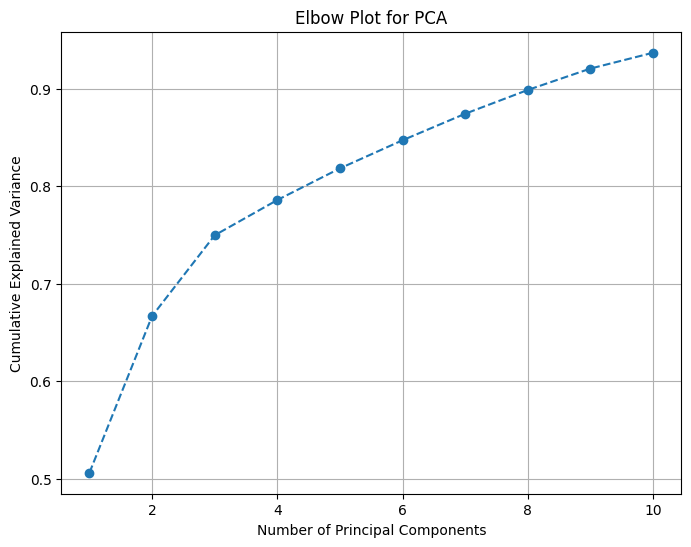

Explained Variance for each Principal Component:
[0.50636131 0.16055022 0.08284057 0.03611744 0.03245065 0.02881458
 0.02717742 0.0243719  0.02191213 0.01623442]
Cumulative Explained Variance:
[0.50636131 0.66691153 0.74975209 0.78586954 0.81832019 0.84713477
 0.87431219 0.8986841  0.92059623 0.93683065]


In [3]:
import split_test_and_train as splt
import feature_selection as fs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Optionally, print the explained variance for each component
print("Explained Variance for each Principal Component:")
print(explained_variance_ratio)

print("Cumulative Explained Variance:")
print(cumulative_variance)

Text(0, 0.5, 'Principal components')

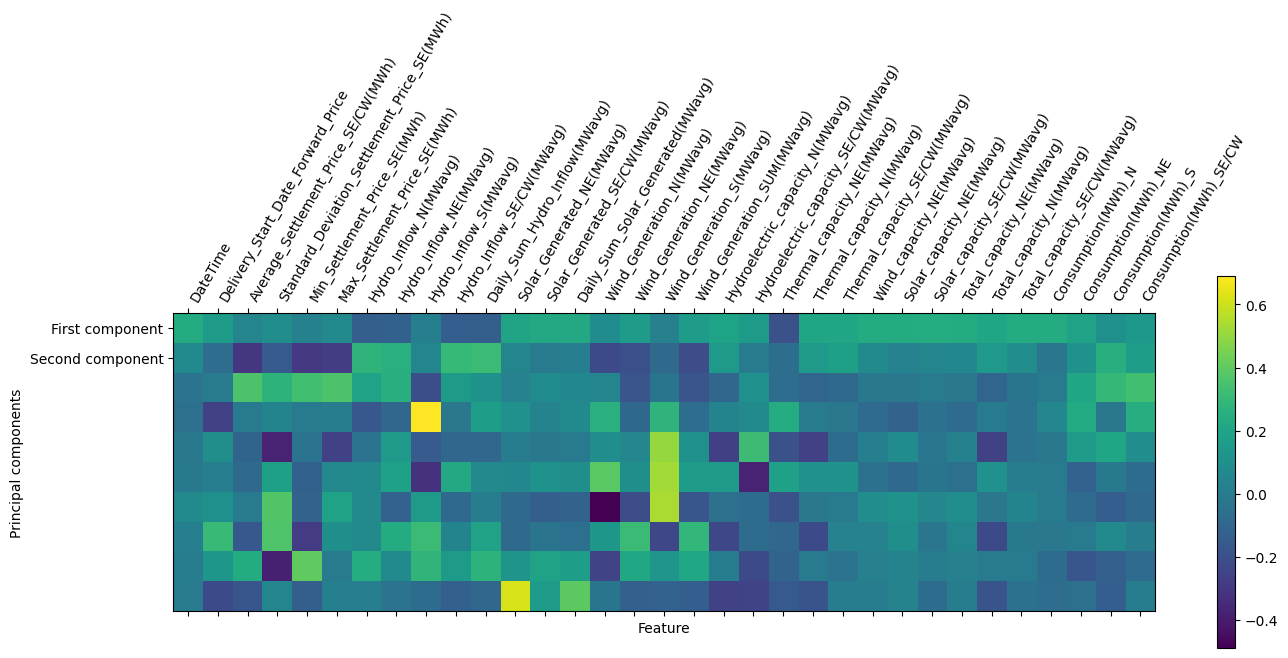

In [4]:
import matplotlib.pyplot as plt
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X_test.columns)),
           X_test.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [5]:
pca.explained_variance_ratio_

array([0.50636131, 0.16055022, 0.08284057, 0.03611744, 0.03245065,
       0.02881458, 0.02717742, 0.0243719 , 0.02191213, 0.01623442])

In [6]:
feature_loadings = pd.DataFrame(
    data=pca.components_.T,
      columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X_test.columns
)

def get_top_features(loadings, n=10):
    return loadings.abs().nlargest(n)

top_features_pc1 = get_top_features(feature_loadings['PC1'])
top_features_pc2 = get_top_features(feature_loadings['PC2'])

print("Top features for PC1:")
print(top_features_pc1)
print("\nTop features for PC2:")
print(top_features_pc2)

Top features for PC1:
Solar_capacity_SE/CW(MWavg)         0.240646
Consumption(MWh)_N                  0.238811
DateTime                            0.238311
Total_capacity_NE(MWavg)            0.237961
Total_capacity_SE/CW(MWavg)         0.237112
Wind_capacity_NE(MWavg)             0.237089
Solar_capacity_NE(MWavg)            0.234811
Daily_Sum_Solar_Generated(MWavg)    0.222805
Solar_Generated_SE/CW(MWavg)        0.220620
Thermal_capacity_SE/CW(MWavg)       0.208028
Name: PC1, dtype: float64

Top features for PC2:
Daily_Sum_Hydro_Inflow(MWavg)          0.316427
Average_Settlement_Price_SE/CW(MWh)    0.302782
Hydro_Inflow_SE/CW(MWavg)              0.300185
Min_Settlement_Price_SE(MWh)           0.293103
Hydro_Inflow_N(MWavg)                  0.279778
Max_Settlement_Price_SE(MWh)           0.272483
Hydro_Inflow_NE(MWavg)                 0.260971
Consumption(MWh)_S                     0.255984
Wind_Generation_N(MWavg)               0.222753
Wind_Generation_SUM(MWavg)             0.209615

PCA Standard scaler

In [7]:
import split_test_and_train as splt
import feature_selection as fs
from sklearn.decomposition import PCA
import pandas as pd
# keep the first ten principal components of the data
pca = PCA(n_components = 10)
X_test =fs.feature_selection(False)
pca.fit(X_test)

# transform data onto the first ten principal components
X_pca = pca.transform(X_test)
print("Original shape: {}".format(str(X_test.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

TypeError: feature_selection() missing 1 required positional argument: 'y_dataset'

Text(0, 0.5, 'Principal components')

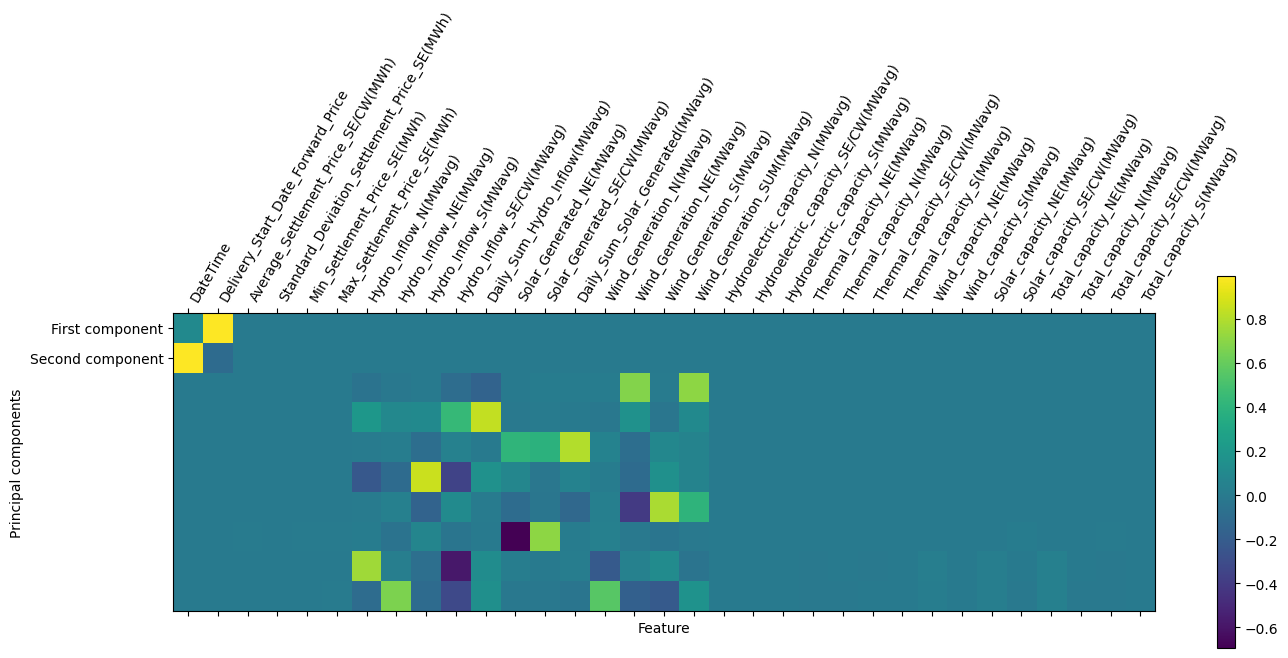

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(X_test.columns)),
           X_test.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [ ]:
pca.explained_variance_ratio_

array([9.85238778e-01, 1.47608882e-02, 2.99960448e-07, 1.94359818e-08,
       5.57773509e-09, 4.04454462e-09, 2.78605820e-09, 7.49872066e-10,
       6.52418020e-10, 1.98535467e-10])

In [ ]:
feature_loadings = pd.DataFrame(
    data=pca.components_.T,
      columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=X_test.columns
)

def get_top_features(loadings, n=10):
    return loadings.abs().nlargest(n)

top_features_pc1 = get_top_features(feature_loadings['PC1'])
top_features_pc2 = get_top_features(feature_loadings['PC2'])

print("Top features for PC1:")
print(top_features_pc1)
print("\nTop features for PC2:")
print(top_features_pc2)

Top features for PC1:
Delivery_Start_Date_Forward_Price    0.994462
DateTime                             0.105097
Wind_Generation_SUM(MWavg)           0.000271
Wind_Generation_NE(MWavg)            0.000263
Daily_Sum_Hydro_Inflow(MWavg)        0.000077
Daily_Sum_Solar_Generated(MWavg)     0.000069
Hydro_Inflow_SE/CW(MWavg)            0.000045
Solar_Generated_SE/CW(MWavg)         0.000041
Solar_Generated_NE(MWavg)            0.000028
Hydro_Inflow_N(MWavg)                0.000021
Name: PC1, dtype: float64

Top features for PC2:
DateTime                             0.994460
Delivery_Start_Date_Forward_Price    0.105097
Wind_Generation_SUM(MWavg)           0.001200
Wind_Generation_NE(MWavg)            0.001181
Daily_Sum_Solar_Generated(MWavg)     0.000646
Solar_Generated_SE/CW(MWavg)         0.000346
Solar_Generated_NE(MWavg)            0.000300
Daily_Sum_Hydro_Inflow(MWavg)        0.000220
Total_capacity_NE(MWavg)             0.000184
Hydro_Inflow_SE/CW(MWavg)            0.000167
Name: PC2